In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [5]:
salary_data = pd.read_csv('Resources/City_PayRoll_LA.csv')
salary_data.head()

C:\Users\elija\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,24,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,% Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),MOU,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,$70386.48,$16129.89,$17829.78,$17678.24,$22946.57,$14273.91,23.67%,$74584.48,$60310.57,$0.00,$0.00,$0.00,NaN,$369.12,$13904.79,$13904.79,NaN,NaN,98,1230,NaN,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,$13859.93,$11968.32,$14048.20,$1700.40,3.43%,$51207.45,$49507.05,$1269.83,$0.00,$239.20,$0.00,$11.13,$180.24,$1689.27,24,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,$23479.20,$21153.60,$24360.49,$4120.20,4.85%,$89029.61,$84909.41,$1954.51,$0.00,$1519.00,$0.00,$482.29,$164.40,$3637.91,24,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,$18560.38,$16471.18,$21110.80,$14275.44,24.76%,$71936.24,$57660.80,$0.00,$1585.72,$935.00,$0.00,$11504.72,$250.00,$2770.72,12,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,$17313.10,$15257.17,$17313.10,$5191.62,8.74%,$64583.37,$59391.75,$0.00,$4774.25,$0.00,$0.00,$417.37,$0.00,$4774.25,3,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf


In [6]:
cols = salary_data.columns[9:17]
cols

Index(['Q1 Payments', 'Q2 Payments', 'Q3 Payments', 'Q4 Payments',
       'Payments Over Base Pay', '% Over Base Pay', 'Total Payments',
       'Base Pay'],
      dtype='object')

In [7]:
salary_data.dropna(subset=['Total Payments'], inplace=True)
columns_replace = [ 'Hourly or Event Rate', 'Projected Annual Salary', 'Q1 Payments',
       'Q2 Payments', 'Q3 Payments', 'Q4 Payments', 'Payments Over Base Pay',
        'Total Payments', 'Base Pay', 'Permanent Bonus Pay',
       'Longevity Bonus Pay', 'Temporary Bonus Pay', 'Lump Sum Pay',
       'Overtime Pay', 'Other Pay & Adjustments',
       'Other Pay (Payroll Explorer)', 'Average Health Cost', 'Average Dental Cost',
       'Average Basic Life', 'Average Benefit Cost']


for col in columns_replace:
    salary_data[col]=salary_data[col].str.replace('$','').astype(float)

In [8]:
# salary_data.columns
salary_data.head()
len(salary_data)

285008

In [9]:
salary_data['% Over Base Pay']=salary_data['% Over Base Pay'].str.replace('%','')
salary_data

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,% Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),MOU,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,70386.48,16129.89,17829.78,17678.24,22946.57,14273.91,23.67,74584.48,60310.57,0.00,0.00,0.0,NaN,369.12,13904.79,13904.79,NaN,NaN,98,1230,NaN,16842.08,1282.61,0.00,18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,25.12,52450.56,11331.00,13859.93,11968.32,14048.20,1700.40,3.43,51207.45,49507.05,1269.83,0.00,239.2,0.0,11.13,180.24,1689.27,24,POLICE OFFICERS UNIT,70,2214,A,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,42.77,89303.76,20036.32,23479.20,21153.60,24360.49,4120.20,4.85,89029.61,84909.41,1954.51,0.00,1519.0,0.0,482.29,164.40,3637.91,24,POLICE OFFICERS UNIT,70,2214,2,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,28.75,60028.96,15793.88,18560.38,16471.18,21110.80,14275.44,24.76,71936.24,57660.80,0.00,1585.72,935.0,0.0,11504.72,250.00,2770.72,12,SUPV BLUE COLLAR,42,3184,0,10710.24,405.24,11.40,11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,30.92,64553.13,14700.00,17313.10,15257.17,17313.10,5191.62,8.74,64583.37,59391.75,0.00,4774.25,0.0,0.0,417.37,0.00,4774.25,3,CLERICAL UNIT,82,1368,0,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/1368.pdf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285003,285204,2016,Water And Power (DWP),NaN,112788496,Waterworks Mechanic Supervisor,Full Time,57.32,119684.16,55484.82,40483.89,0.00,0.00,37801.25,64.99,95968.71,58167.46,0.00,2223.34,0.0,0.0,30861.05,4716.86,6940.20,B,Supervisory Blue Collar Unit,98,3987,NaN,18144.43,1248.19,0.00,19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf
285004,285205,2016,Water And Power (DWP),NaN,2560101653,Waterworks Mechanic Supervisor,Full Time,58.76,122690.88,45921.05,32986.77,0.00,0.00,20740.49,35.66,78907.82,58167.33,0.00,3548.21,0.0,0.0,11941.36,5250.92,8799.13,B,Supervisory Blue Collar Unit,98,3987,NaN,18144.43,1248.19,0.00,19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf
285005,285206,2016,Water And Power (DWP),NaN,3792124730,Waterworks Mechanic Supervisor,Full Time,58.76,122690.88,54746.99,36433.31,0.00,0.00,32971.11,56.64,91180.30,58209.19,0.00,4157.49,0.0,0.0,23962.96,4850.66,9008.15,B,Supervisory Blue Collar Unit,98,3987,NaN,18144.43,1248.19,0.00,19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf
285006,285207,2016,Water And Power (DWP),NaN,2425641362,Waterworks Mechanic Supervisor,Full Time,58.76,122690.88,52753.23,38925.91,0.00,0.00,33060.46,56.40,91679.14,58618.68,0.00,4160.13,0.0,0.0,23596.38,5303.95,9464.08,B,Supervisory Blue Collar Unit,98,3987,NaN,18144.43,1248.19,0.00,19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf


In [10]:
salary_data = salary_data.replace(0,np.nan).dropna(axis=0, how='all')
salary_data.dropna(subset=cols, inplace=True)
salary_data.head()
# cleaned_csv = salary_data.to_csv('Output/Final_Cleaned.csv', index=False)

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,% Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),MOU,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,70386.48,16129.89,17829.78,17678.24,22946.57,14273.91,23.67,74584.48,60310.57,NaN,NaN,NaN,NaN,369.12,13904.79,13904.79,NaN,NaN,98,1230,NaN,16842.08,1282.61,NaN,18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,25.12,52450.56,11331.00,13859.93,11968.32,14048.20,1700.40,3.43,51207.45,49507.05,1269.83,NaN,239.2,NaN,11.13,180.24,1689.27,24,POLICE OFFICERS UNIT,70,2214,A,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,42.77,89303.76,20036.32,23479.20,21153.60,24360.49,4120.20,4.85,89029.61,84909.41,1954.51,NaN,1519.0,NaN,482.29,164.40,3637.91,24,POLICE OFFICERS UNIT,70,2214,2,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,28.75,60028.96,15793.88,18560.38,16471.18,21110.80,14275.44,24.76,71936.24,57660.80,NaN,1585.72,935.0,NaN,11504.72,250.00,2770.72,12,SUPV BLUE COLLAR,42,3184,0,10710.24,405.24,11.40,11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,30.92,64553.13,14700.00,17313.10,15257.17,17313.10,5191.62,8.74,64583.37,59391.75,NaN,4774.25,NaN,NaN,417.37,NaN,4774.25,3,CLERICAL UNIT,82,1368,0,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/1368.pdf


In [11]:
group_salary = salary_data.groupby('Department Title').nunique()
select_data = group_salary[group_salary['Total Payments']>7500]
select_index = select_data.index
group_salary.sort_values('Total Payments', ascending = False)
select_data
select_index

Index(['Airports (LAWA)', 'Fire (LAFD)', 'Police (LAPD)',
       'Recreation And Parks', 'Water And Power (DWP)'],
      dtype='object', name='Department Title')

In [12]:
dataset = salary_data.loc[salary_data['Department Title'].isin(select_index)].copy(deep=True)
dataset = dataset.sort_values('Total Payments', ascending = False)
dataset

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,% Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),MOU,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
168006,123010,2015,Fire (LAFD),3001.0,1081092723,Fire Captain I,Full Time,63.51,132603.66,95633.26,107862.25,122415.22,122683.60,327765.53,271.26,448594.33,120828.80,9967.6,NaN,1088.00,2137.63,311315.62,3256.68,16449.91,23,FIREFIGHTERS & FIRE CAPTAINS,38,2142,1,13031.40,896.76,178.68,14106.84,Fire,http://per.lacity.org/perspecs/2142.pdf
142297,162626,2015,Water And Power (DWP),NaN,2720285819,Electrical Service Manager,Full Time,123.12,257074.56,78928.80,58554.62,156964.90,130418.51,294852.11,226.78,424866.83,130014.72,NaN,NaN,NaN,NaN,NaN,294852.11,294852.11,M,MANAGEMENT EMPLOYEES UNIT,98,5265,NaN,17486.94,1268.69,NaN,18755.63,DWP,http://per.lacity.org/perspecs/5265.pdf
155335,123011,2015,Fire (LAFD),3001.0,2236794545,Fire Captain I,Full Time,63.39,132347.88,87225.34,92065.04,127257.45,98818.97,284538.00,235.49,405366.80,120828.80,9690.4,NaN,1088.00,NaN,273495.60,264.00,11042.40,23,FIREFIGHTERS & FIRE CAPTAINS,38,2142,1,13031.40,896.76,178.68,14106.84,Fire,http://per.lacity.org/perspecs/2142.pdf
119602,123012,2015,Fire (LAFD),3001.0,2837442648,Firefighter III,Full Time,39.64,82766.83,74708.81,105354.78,117150.25,107094.21,317149.65,363.88,404308.05,87158.40,19752.4,7410.00,1088.00,NaN,286732.56,2166.69,30417.09,23,FIREFIGHTERS & FIRE CAPTAINS,38,2112,3,13031.40,896.76,178.68,14106.84,Fire,http://per.lacity.org/perspecs/2112.pdf
46520,103240,2014,Water And Power (DWP),NaN,3314958958,Power Engineering Manager,Full Time,NaN,258494.40,67843.00,78582.83,67931.00,188913.96,181955.59,82.22,403270.79,221315.20,1284.8,NaN,NaN,NaN,NaN,180670.79,181955.59,NaN,NaN,98,9453,NaN,16842.08,1282.61,NaN,18124.69,DWP,http://per.lacity.org/perspecs/9453.pdf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92508,100884,2014,Recreation And Parks,7903.0,265061693,Museum Guide,Part Time,14.98,31278.24,218.70,217.21,107.86,109.35,17.44,0.03,653.12,635.68,NaN,17.44,NaN,NaN,NaN,NaN,17.44,03,CLERICAL UNIT,88,2401,0,NaN,NaN,NaN,NaN,NaN,http://per.lacity.org/perspecs/2401.pdf
75260,100904,2014,Recreation And Parks,7903.0,1867618501,Recreation Assistant,Part Time,14.79,30881.52,162.70,147.90,177.48,118.32,16.40,0.03,606.40,590.00,NaN,16.40,NaN,NaN,NaN,NaN,16.40,07,RECREATIONAL ASST. UNIT,88,2498,A,NaN,NaN,NaN,NaN,NaN,http://per.lacity.org/perspecs/2498.pdf
232472,44517,2013,Recreation And Parks,7903.0,684896554,Museum Guide,Part Time,14.58,30443.04,100.31,163.95,94.77,112.96,9.92,0.02,471.99,462.07,NaN,NaN,9.92,NaN,NaN,NaN,9.92,3,CLERICAL UNIT,88,2401,0,NaN,NaN,NaN,NaN,NaN,http://per.lacity.org/perspecs/2401.pdf
183764,160333,2015,Recreation And Parks,7903.0,139340269,Recreation Assistant,Part Time,15.61,32593.68,62.44,85.86,202.93,78.05,11.55,0.03,429.28,417.73,NaN,11.55,NaN,NaN,NaN,NaN,11.55,07,RECREATION ASSISTANTS,88,2498,C,NaN,NaN,NaN,NaN,NaN,http://per.lacity.org/perspecs/2498.pdf


In [13]:
filt = (dataset['Department Title'] == 'Police (LAPD)')

In [14]:
police_df = dataset.loc[filt]
police_df.head()

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,% Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),MOU,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
105392,75545,2014,Police (LAPD),4301.0,3978800535,Chief of Police,Full Time,165.58,345731.04,94937.52,92724.80,79478.40,92724.80,15459.12,4.49,359865.52,344406.40,NaN,NaN,NaN,7947.84,NaN,7511.28,15459.12,00,NON-REPRESENTED,70,9359,0,11976.00,873.24,193.32,13042.56,Police,http://per.lacity.org/perspecs/9359.pdf
122240,133830,2015,Police (LAPD),4301.0,3978800535,Chief of Police,Full Time,165.58,345731.04,86763.92,92724.80,92724.80,79478.40,7285.52,2.12,351691.92,344406.40,NaN,NaN,NaN,7285.52,NaN,NaN,7285.52,00,NON-REPRESENTED EMPLOYEES,70,9359,0,11973.12,873.24,192.36,13038.72,Police,http://per.lacity.org/perspecs/9359.pdf
49875,19334,2013,Police (LAPD),4301.0,3978800535,Chief of Police,Full Time,157.69,329256.72,81668.48,87001.60,75486.16,88306.40,7457.28,2.29,332462.64,325005.36,NaN,NaN,NaN,7457.28,NaN,NaN,7457.28,00,NON-REPRESENTED,70,9359,0,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/9359.pdf
131399,133831,2015,Police (LAPD),4301.0,723535589,Police Officer II,Full Time,43.62,91078.56,255350.55,24754.35,25952.20,20937.60,238703.50,270.36,326994.70,88291.20,2336.8,NaN,1525.0,NaN,327.15,234514.55,238376.35,24,"POLICE OFFICERS, LTS. AND BELOW",70,2214,2,11973.12,873.24,192.36,13038.72,Police,http://per.lacity.org/perspecs/2214.pdf
150785,133832,2015,Police (LAPD),4301.0,1106974109,Police Detective II,Full Time,64.32,134300.16,52404.73,52276.08,59163.06,133335.68,209797.15,240.09,297179.55,87382.40,19388.8,NaN,1825.0,128511.68,58785.27,1286.40,151011.88,24,"POLICE OFFICERS, LTS. AND BELOW",70,2223,2,11973.12,873.24,192.36,13038.72,Police,http://per.lacity.org/perspecs/2223.pdf


In [15]:
police_count = police_df['Job Class Title'].value_counts()
police_count

Police Officer II                12718
Police Officer III                6348
Police Sergeant I                 2229
Police Detective II               1887
Police Detective I                1779
                                 ...  
General Automotive Supervisor        1
Plumber                              1
Information Systems Manager I        1
Forensic Print Specialist I          1
Municipal Police Lieutenant          1
Name: Job Class Title, Length: 188, dtype: int64

In [16]:
#how many different job titles in police dept.
len(police_count)

188

In [17]:
#top 4 populated job class titles in department
job_titles = police_count[police_count>1800].index
job_titles

Index(['Police Officer II', 'Police Officer III', 'Police Sergeant I',
       'Police Detective II'],
      dtype='object')

In [18]:
#display new DataFrame accounting for top 4 jobs
police_df_final = police_df[police_df['Job Class Title'].isin(job_titles)].copy(deep=True)
police_df_final.head()

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,% Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),MOU,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
131399,133831,2015,Police (LAPD),4301.0,723535589,Police Officer II,Full Time,43.62,91078.56,255350.55,24754.35,25952.20,20937.60,238703.50,270.36,326994.70,88291.20,2336.80,NaN,1525.0,NaN,327.15,234514.55,238376.35,24,"POLICE OFFICERS, LTS. AND BELOW",70,2214,2,11973.12,873.24,192.36,13038.72,Police,http://per.lacity.org/perspecs/2214.pdf
150785,133832,2015,Police (LAPD),4301.0,1106974109,Police Detective II,Full Time,64.32,134300.16,52404.73,52276.08,59163.06,133335.68,209797.15,240.09,297179.55,87382.40,19388.80,NaN,1825.0,128511.68,58785.27,1286.40,151011.88,24,"POLICE OFFICERS, LTS. AND BELOW",70,2223,2,11973.12,873.24,192.36,13038.72,Police,http://per.lacity.org/perspecs/2223.pdf
166324,133858,2015,Police (LAPD),4301.0,4290070208,Police Officer III,Full Time,63.75,133110.78,50722.28,52807.71,56234.70,61887.23,117719.79,113.27,221651.92,103932.13,23235.92,NaN,1705.0,2769.03,89432.96,576.88,28286.83,24,"POLICE OFFICERS, LTS. AND BELOW",70,2214,3,11973.12,873.24,192.36,13038.72,Police,http://per.lacity.org/perspecs/2214.pdf
149792,133860,2015,Police (LAPD),4301.0,4050472816,Police Detective II,Full Time,54.75,114318.00,48379.38,55342.91,64456.50,51603.56,110291.15,100.73,219782.35,109491.20,4388.80,NaN,1941.0,2628.00,101333.35,NaN,8957.80,24,"POLICE OFFICERS, LTS. AND BELOW",70,2223,2,11973.12,873.24,192.36,13038.72,Police,http://per.lacity.org/perspecs/2223.pdf
80931,75569,2014,Police (LAPD),4301.0,4050472816,Police Detective II,Full Time,54.75,114318.00,40055.17,63824.47,51749.38,61612.72,108719.79,100.18,217241.74,108521.95,4350.45,NaN,1441.0,2576.64,102391.54,-2039.84,6328.25,24,POLICE OFFICERS UNIT,70,2223,2,11976.00,873.24,193.32,13042.56,Police,http://per.lacity.org/perspecs/2223.pdf


In [19]:
import seaborn as sns

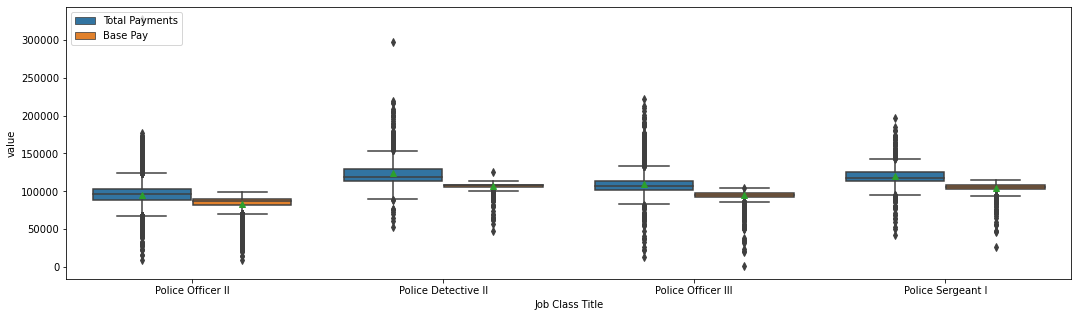

In [20]:
fig, ax = plt.subplots(figsize=(18,5))
dd=pd.melt(police_df_final,id_vars=['Job Class Title'],value_vars=['Total Payments', 'Base Pay'],var_name='test')
sns.boxplot(x='Job Class Title',y='value',data=dd,hue='test', showmeans=True)
plt.legend(loc='upper left')
ax.tick_params(rotation=0)

<AxesSubplot:xlabel='Department Title', ylabel='Total Payments'>

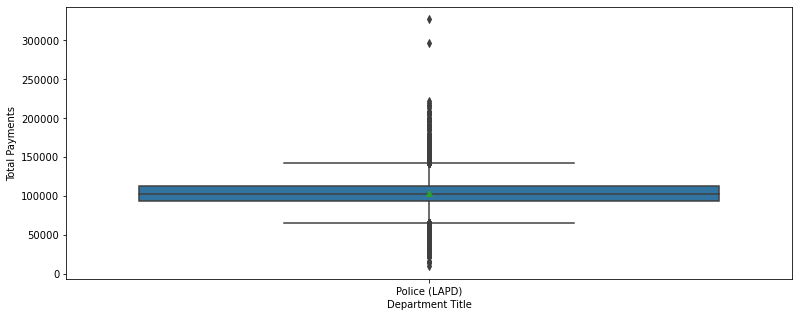

In [21]:
# fig, ax = plt.subplots(figsize = (13,5))
# # sns.stripplot(x='Department Title',y='Total Payments', data = dataset, alpha = 0.2, ax = ax,hue ='Year')
# sns.boxplot(x='Department Title',y='Total Payments', data = police_df_final, ax = ax, showmeans=True)

<AxesSubplot:xlabel='Department Title', ylabel='Total Payments'>

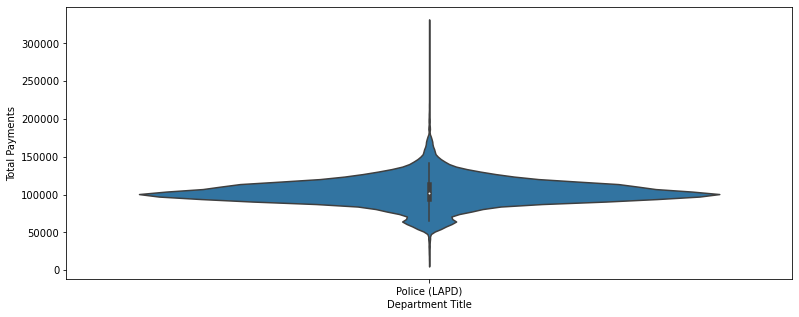

In [22]:
# fig, ax = plt.subplots(figsize = (13,5))
# sns.violinplot(x='Department Title',y='Total Payments', data = police_df_final, ax = ax, showmeans=True)

Text(0.5, 1.0, 'Histogram of Police Projected Annual Salaries')

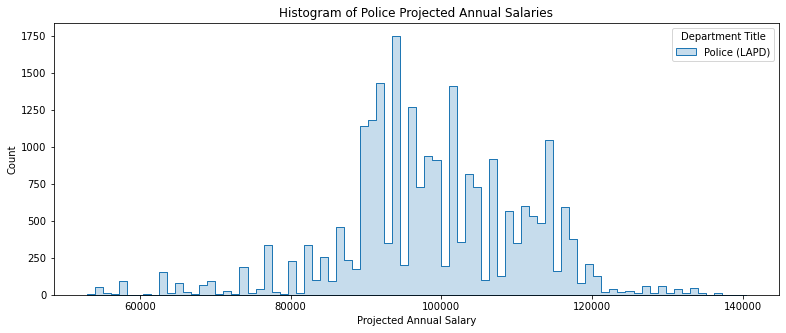

In [23]:
# fig, ax = plt.subplots(figsize = (13,5))
# # sns.histplot(x='Department Title',y='Total Payments', data = dataset, ax = ax, showmeans=True)
# sns.histplot(data=police_df_final, x='Projected Annual Salary', hue='Department Title', element='step').set_title('Histogram of Police Projected Annual Salaries')

Text(0.5, 1.0, 'Histogram of Total Payments of Police')

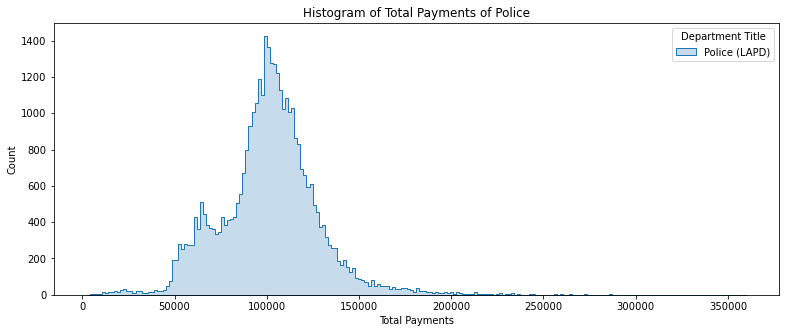

In [24]:
# fig, ax = plt.subplots(figsize = (13,5))
# # sns.histplot(x='Department Title',y='Total Payments', data = dataset, ax = ax, showmeans=True)
# sns.histplot(data=police_df, x='Total Payments', hue='Department Title', element='step').set_title('Histogram of Total Payments of Police')

In [25]:
Police_yearly_group = police_df.groupby('Year').mean()
Police_yearly_group

,Row ID,Payroll Department,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),FMS Department,Job Class,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost
Year,,,,,,,,,,,,,,,,,,,,,,,,
2013,25704.626191,4301.233411,45.246405,94474.613827,21404.367642,25025.278266,22599.407631,25686.069363,8397.457160,94715.122902,86317.665742,4828.303255,3392.380567,1165.467380,2943.252300,3601.105616,-10.861383,6512.964601,70.0,2313.019371,11443.416383,789.169033,151.341992,12383.927408
2014,81800.867791,4301.228405,47.076970,98152.553565,23214.055635,26249.464184,24656.002779,28150.740985,12939.667058,102270.263583,89330.596525,5042.205213,6566.089490,1169.318057,2819.378395,7088.237510,-114.176238,7141.042936,70.0,2307.707519,11766.623929,773.754175,154.277672,12694.655776
2015,139999.973223,4301.218099,47.481029,98846.188325,24517.836701,28239.436463,29432.931871,24688.313623,15252.985947,106878.518658,91625.532711,5100.938150,2865.746678,1618.015755,2565.232477,9653.481559,486.569025,7325.964957,70.0,2313.527273,11774.041816,777.530291,154.861886,12706.433993


Text(0.5, 1.0, 'Police Hourly or Event Rate Change')

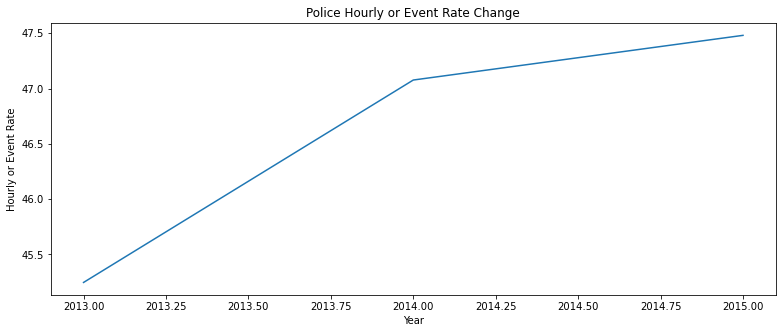

In [26]:
fig, ax2 = plt.subplots(figsize = (13,5))

sns.lineplot(x='Year',y='Hourly or Event Rate', data = Police_yearly_group, ax=ax2, markers=True, markersize=10).set_title('Police Hourly or Event Rate Change')

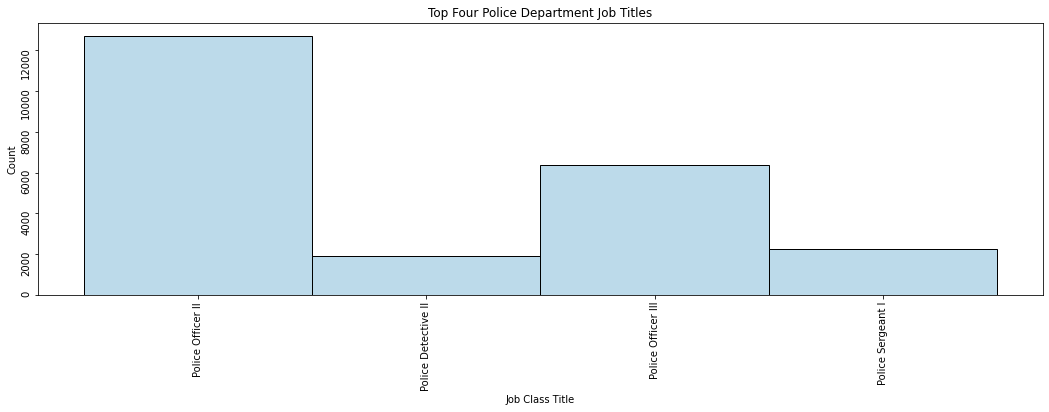

In [81]:
police_df_final = police_df_final[police_df_final['Base Pay']>0]
police_df_final = police_df_final[(police_df_final['Q1 Payments']>0) &
            (police_df_final['Q2 Payments']>0) &
            (police_df_final['Q3 Payments']>0) &
            (police_df_final['Q4 Payments']>0)]
fig, ax = plt.subplots(figsize =(18,5))
sns.histplot(data= police_df_final, x='Job Class Title').set_title('Top Four Police Department Job Titles')
ax.tick_params(rotation=90)

# Police Officer II                12718
# Police Officer III                6348
# Police Sergeant I                 2229
# Police Detective II               1887

In [28]:
# job titles with greater than 100 records
temp = police_df['Job Class Title'].value_counts()
job_titles = temp[temp>100].index
job_titles

Index(['Police Officer II', 'Police Officer III', 'Police Sergeant I',
       'Police Detective II', 'Police Detective I', 'Police Sergeant II',
       'Police Service Representative II', 'Senior Clerk Typist',
       'Police Detective III', 'Detention Officer', 'Police Officer I',
       'Security Officer', 'Clerk Typist', 'Police Lieutenant II',
       'Police Service Representative III', 'Police Lieutenant I',
       'Criminalist II', 'Equipment Mechanic', 'Administrative Clerk',
       'Senior Detention Officer', 'Management Analyst II', 'Secretary',
       'Property Officer', 'Forensic Print Specialist III',
       'Senior Police Service Representative I', 'Police Captain III'],
      dtype='object')

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,% Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),MOU,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
131399,133831,2015,Police (LAPD),4301.0,723535589,Police Officer II,Full Time,43.62,91078.56,255350.55,24754.35,25952.20,20937.60,238703.50,270.36,326994.70,88291.20,2336.80,NaN,1525.0,NaN,327.15,234514.55,238376.35,24,"POLICE OFFICERS, LTS. AND BELOW",70,2214,2,11973.12,873.24,192.36,13038.72,Police,http://per.lacity.org/perspecs/2214.pdf
150785,133832,2015,Police (LAPD),4301.0,1106974109,Police Detective II,Full Time,64.32,134300.16,52404.73,52276.08,59163.06,133335.68,209797.15,240.09,297179.55,87382.40,19388.80,NaN,1825.0,128511.68,58785.27,1286.40,151011.88,24,"POLICE OFFICERS, LTS. AND BELOW",70,2223,2,11973.12,873.24,192.36,13038.72,Police,http://per.lacity.org/perspecs/2223.pdf
32073,75547,2014,Police (LAPD),4301.0,4107972746,Police Lieutenant II,Full Time,69.28,144656.64,36146.75,38796.80,38044.64,171065.13,187104.63,192.99,284053.32,96948.69,5813.23,NaN,1205.0,174325.29,9564.63,-3803.52,177540.00,24,POLICE OFFICERS UNIT,70,2232,2,11976.00,873.24,193.32,13042.56,Police,http://per.lacity.org/perspecs/2232.pdf
120759,133836,2015,Police (LAPD),4301.0,1697080524,Police Detective III,Full Time,61.02,127409.76,66798.60,74764.77,74600.51,60141.34,154271.62,126.42,276305.22,122033.60,4888.00,NaN,1825.0,2928.96,143714.36,915.30,10557.26,24,"POLICE OFFICERS, LTS. AND BELOW",70,2223,3,11973.12,873.24,192.36,13038.72,Police,http://per.lacity.org/perspecs/2223.pdf
141557,133837,2015,Police (LAPD),4301.0,1719155702,Police Captain III,Full Time,87.44,182574.72,76323.04,49716.40,50716.40,83632.96,78926.40,43.49,260388.80,181462.40,412.80,NaN,7250.0,4197.12,37511.76,29554.72,41414.64,25,"POLICE OFFICERS, CAPT. AND ABOVE",70,2244,3,11973.12,873.24,192.36,13038.72,Police,http://per.lacity.org/perspecs/2244.pdf


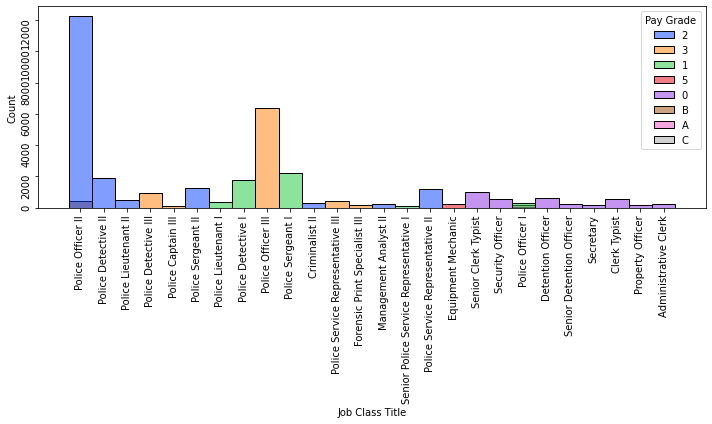

In [29]:
#filtering police_df for interested job titles

df_final = police_df[police_df['Job Class Title'].isin(job_titles)].copy(deep=True)
# df_final['Pay Grade'] = df_final['Pay Grade'].astype(int)

fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(data=df_final, x='Job Class Title',hue='Pay Grade',palette ='bright')
ax.tick_params(rotation=90)
plt.tight_layout()
# plt.savefig('Output/fire_filter_records100_barchart.png')

df_final.head()

In [30]:
df_final['Pay Grade'].value_counts()

2    17543
3     7959
1     4771
0     3463
B      444
5      255
A      182
C       66
Name: Pay Grade, dtype: int64

In [31]:
df_final[df_final['Pay Grade']=='0']['Job Class Title'].unique()

array(['Senior Clerk Typist', 'Security Officer', 'Detention Officer',
       'Senior Detention Officer', 'Secretary', 'Clerk Typist',
       'Property Officer', 'Administrative Clerk'], dtype=object)

In [32]:
df_final[df_final['Pay Grade']=='1']['Job Class Title'].unique()


array(['Police Lieutenant I', 'Police Detective I', 'Police Sergeant I',
       'Senior Police Service Representative I', 'Police Officer I'],
      dtype=object)

In [33]:
df_final[df_final['Pay Grade']=='2']['Job Class Title'].unique()

array(['Police Officer II', 'Police Detective II', 'Police Lieutenant II',
       'Police Sergeant II', 'Criminalist II', 'Management Analyst II',
       'Police Service Representative II'], dtype=object)

In [34]:
df_final[df_final['Pay Grade']=='3']['Job Class Title'].unique()

array(['Police Detective III', 'Police Captain III', 'Police Officer III',
       'Police Service Representative III',
       'Forensic Print Specialist III'], dtype=object)

In [35]:
df_final[df_final['Pay Grade']=='5']['Job Class Title'].unique()

array(['Equipment Mechanic'], dtype=object)

In [36]:
df_final[df_final['Pay Grade']=='B']['Job Class Title'].unique()

array(['Police Officer II'], dtype=object)

In [37]:
df_final[df_final['Pay Grade']=='A']['Job Class Title'].unique()

array(['Police Officer I'], dtype=object)

In [38]:
df_final[df_final['Pay Grade']=='C']['Job Class Title'].unique()

array(['Police Officer I'], dtype=object)

In [39]:
# df_final = df_final[df_final['Pay Grade']]

<AxesSubplot:xlabel='% Over Base Pay', ylabel='Count'>

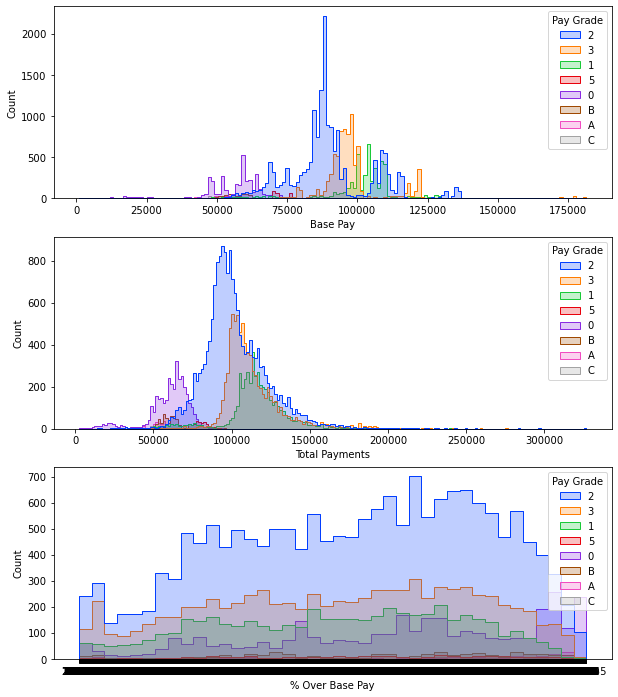

In [40]:
# fig, ax = plt.subplots(3, figsize = (10,12))
# sns.histplot(data=df_final, x = 'Base Pay', hue='Pay Grade',palette ='bright',element='step', discrete = False ,ax = ax[0])
# sns.histplot(data=df_final, x = 'Total Payments', hue='Pay Grade',palette ='bright', ax = ax[1],element='step', discrete = False)
# sns.histplot(data=df_final, x = '% Over Base Pay', hue='Pay Grade',palette ='bright', ax = ax[2],element='step', discrete = False)

# Base Pay is showing clear bins of data but total payment is not which is indicative of overtime/other payments

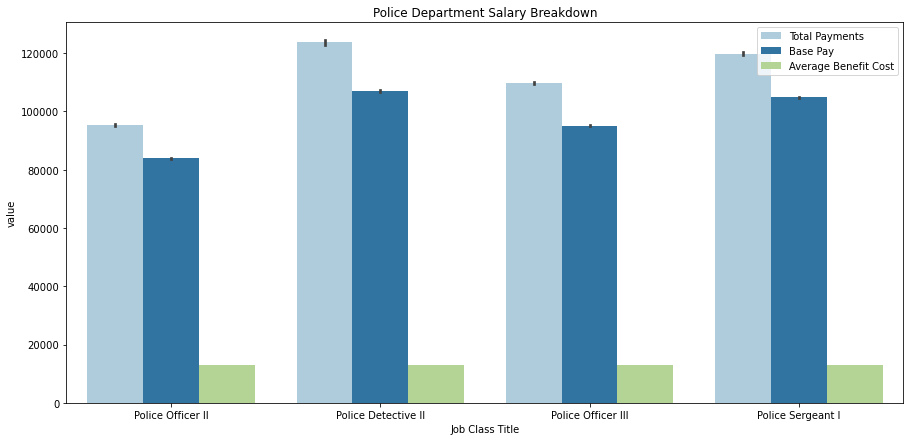

In [84]:
fig, ax = plt.subplots(figsize=(15,7))
police_data=pd.melt(police_df_final,id_vars=['Job Class Title'],value_vars=['Total Payments','Base Pay', 'Average Benefit Cost'],var_name='Year')
sns.set_palette(sns.color_palette("Paired"))
sns.barplot(x='Job Class Title',y='value',data=police_data,hue='Year').set_title('Police Department Salary Breakdown')
ax.tick_params(rotation=0)
plt.legend(loc='upper right')


In [42]:
# group_data = df_final.groupby(['Pay Grade','Job Class Title','Year'])

In [43]:
# summary = group_data['Base Pay','Total Payments'].mean()
# # summary.pivot(columns='Year')
# summary.unstack(level=-1)
# # summary

<ipython-input-43-7fe23db64f91>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  summary = group_data['Base Pay','Total Payments'].mean()


Base Pay  \
Year                                                       2013   
Pay Grade Job Class Title                                         
0         Administrative Clerk                              NaN   
          Clerk Typist                             46721.302186   
          Detention Officer                        59117.200766   
          Property Officer                         56343.694259   
          Secretary                                62845.039787   
          Security Officer                         37603.750905   
          Senior Clerk Typist                      57666.131351   
          Senior Detention Officer                 66255.300179   
1         Police Detective I                       98859.712855   
          Police Lieutenant I                     118546.740286   
          Police Officer I                                  NaN   
          Police Sergeant I                       103055.348189   
          Senior Police Service Representative I   82923.074444   
2         Criminalist II                           97136.141900   
          Management Analyst II                    84854.230811   
          Police Detective II                     104720.087003   
          Police Lieutenant II                    129648.750066   
          Police Officer II                        83860.637706   
          Police Sergeant II                      109712.829056   
          Police Service Representative II         66504.211469   
3         Forensic Print Specialist III            89480.829574   
          Police Captain III                      167146.789429   
          Police Detective III                    115689.586782   
          Police Officer III                       93396.779261   
          Police Service Representative III        77110.243878   
5         Equipment Mechanic                       68668.038750   
A         Police Officer I                         50263.827238   
B         Police Officer II                        55955.363126   
C         Police Officer I                                  NaN   

                                                                 \
Year                                                       2014   
Pay Grade Job Class Title                                         
0         Administrative Clerk                              NaN   
          Clerk Typist                             47119.478893   
          Detention Officer                        59218.803476   
          Property Officer                         57678.512273   
          Secretary                                62609.251277   
          Security Officer                         37018.813281   
          Senior Clerk Typist                      58189.500880   
          Senior Detention Officer                 63591.399091   
1         Police Detective I                      101014.260938   
          Police Lieutenant I                     122863.905446   
          Police Officer I                         54864.395655   
          Police Sergeant I                       105936.524435   
          Senior Police Service Representative I   81951.114565   
2         Criminalist II                          101148.031619   
          Management Analyst II                    86556.822429   
          Police Detective II                     107939.950611   
          Police Lieutenant II                    133632.748839   
          Police Officer II                        84159.920486   
          Police Sergeant II                      113456.232700   
          Police Service Representative II         67183.552377   
3         Forensic Print Specialist III            92051.340435   
          Police Captain III                      171920.150556   
          Police Detective III                    119177.194259   
          Police Officer III                       95737.309270   
          Police Service Representative III        78201.997254   
5         Equipment Mechanic      

In [44]:
# summary_data = police_df_final.groupby(['Pay Grade','Job Class Title','Year'])
# summary = summary_data['Base Pay','Total Payments'].mean()
# # summary.pivot(columns='Year')
# summary.unstack(level=-1)
# # summary

<ipython-input-44-3ce3cf46c8dc>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  summary = summary_data['Base Pay','Total Payments'].mean()


Base Pay                                \
Year                                    2013           2014           2015   
Pay Grade Job Class Title                                                    
1         Police Sergeant I    103055.348189  105936.524435  105488.287487   
2         Police Detective II  104720.087003  107939.950611  108227.379568   
          Police Officer II     83860.637706   84169.924721   86523.527293   
3         Police Officer III    93396.779261   95737.309270   96037.751703   
B         Police Officer II     55955.363126   51511.880000            NaN   

                              Total Payments                                
Year                                    2013           2014           2015  
Pay Grade Job Class Title                                                   
1         Police Sergeant I    114171.393432  121165.034770  123734.037565  
2         Police Detective II  114232.588205  124791.426740  131795.349680  
          Police Officer II     92095.231020   96398.581121  101313.469456  
3         Police Officer III   102848.753322  110706.350320  114780.059869  
B         Police Officer II     59036.262184   61430.348889            NaN

In [85]:
police_df = police_df_final.groupby(['Job Class Title', 'Year'])
police_data = police_df.mean()
police_data = police_data[['Total Payments', 'Base Pay', 'Average Benefit Cost', 'Payments Over Base Pay' ]]
police_data

Total Payments       Base Pay  Average Benefit Cost  \
Job Class Title     Year                                                        
Police Detective II 2013   114232.588205  104720.087003              12740.52   
                    2014   124791.426740  107939.950611              13042.56   
                    2015   131795.349680  108227.379568              13038.72   
Police Officer II   2013    88844.631689   81116.787245              12740.52   
                    2014    96325.510750   84101.681767              13042.56   
                    2015   101313.469456   86523.527293              13038.72   
Police Officer III  2013   102848.753322   93396.779261              12740.52   
                    2014   110706.350320   95737.309270              13042.56   
                    2015   114780.059869   96037.751703              13038.72   
Police Sergeant I   2013   114171.393432  103055.348189              12740.52   
                    2014   121165.034770  105936.524435              13042.56   
                    2015   123734.037565  105488.287487              13038.72   

                          Payments Over Base Pay  
Job Class Title     Year                          
Police Detective II 2013             9512.501202  
                    2014            16851.476129  
                    2015            23567.970112  
Police Officer II   2013             7727.844444  
                    2014            12223.828983  
                    2015            14789.942163  
Police Officer III  2013             9451.974061  
                    2014            14969.041050  
                    2015            18742.308166  
Police Sergeant I   2013            11116.045243  
                    2014            15228.510335  
                    2015            18245.750078

In [87]:
len(police_data)

12

In [88]:
police_data['% increase Tot Pay'] = police_data['Total Payments'].groupby(level=0).pct_change()*100
police_data['% increase Base Pay'] = police_data['Base Pay'].groupby(level=0).pct_change()*100
police_data['% increase Benefits'] = police_data['Average Benefit Cost'].groupby(level=0).pct_change()*100
police_data['Cum % increase Tot Pay'] = police_data['% increase Tot Pay'].groupby(level=0).cumsum()
police_data['Cum % increase Base Pay'] = police_data['% increase Base Pay'].groupby(level=0).cumsum()
police_data['Cum % increase Benefits'] = police_data['% increase Benefits'].groupby(level=0).cumsum()
police_data.reset_index(inplace=True)

In [89]:
police_data.keys()

Index(['Job Class Title', 'Year', 'Total Payments', 'Base Pay',
       'Average Benefit Cost', 'Payments Over Base Pay', '% increase Tot Pay',
       '% increase Base Pay', '% increase Benefits', 'Cum % increase Tot Pay',
       'Cum % increase Base Pay', 'Cum % increase Benefits'],
      dtype='object')

In [90]:
salary_growth = {'Job Class Title': ['Police Detective II', 'Police Officer II',
                                    'Police Officer III','Police Sergeant I'],
                '% Increase of Total Payments': ['14.85%','13.60%','11.32%','8.25%']}
salary_growth_df = pd.DataFrame(salary_growth)
salary_growth_df

,Job Class Title,% Increase of Total Payments
0,Police Detective II,14.85%
1,Police Officer II,13.60%
2,Police Officer III,11.32%
3,Police Sergeant I,8.25%


In [97]:
years = [2014, 2015]
police_data_file = police_data[police_data['Year'].isin(years)]
police_data_file  = police_data_file [['Job Class Title', 'Year', 'Cum % increase Tot Pay', 'Cum % increase Base Pay','Cum % increase Benefits']]
police_data_file.to_csv('Output/Police_Dpt.csv')
# police_data_file